##Подгрузка датасета

In [ ]:
!gdown --id 1IgyD6jJJem6uF5VnDDkCP6AIK5og1KTR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1IgyD6jJJem6uF5VnDDkCP6AIK5og1KTR
To: /content/Вакансии_для_статистики.csv
100% 18.6M/18.6M [00:00<00:00, 269MB/s]


## Подгрузка данных в питон и начало работы с ними

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('Вакансии_для_статистики.csv') #подругрузка файла

In [ ]:
df = pd.DataFrame(dataset)

##Отключение ограничения показа всех строк таблиц

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

##Подключение библиотек

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8 #параметр отображения графиков

import warnings
warnings.filterwarnings('ignore') #отключение предупреждений библиотек

##Проверим зависимость начальной зарплаты от типа графика работы и от опыта работы

Мы готовы совершить ошибку первого рода с вероятностью 0.05 (сравниваем с p-value)

---



###Фильтрация датафрейма по средней зарплате. Убираем вакансии, в которых не указана начальная зарплата

In [ ]:
df['experience'] = df['experience'].str.replace(' ', '_')

In [ ]:
df['schedule'] = df['schedule'].str.replace(' ', '_')

In [ ]:
df.rename(columns = {'Средняя заработная плата' : 'Средняя_зп'}, inplace = True) 

In [ ]:
df1 = df[df['Средняя_зп'] > 0]

#Проведем статистический анализ вакансий по 1С

In [ ]:
df2 = df1[df1["name_prof"] == "1С разработчик"]

##Создадим новый датафрейм со столбцами график, начальная зарплата, опыт

In [ ]:
df3 = df2[['schedule','experience','Средняя_зп']]
df3

,schedule,experience,Средняя_зп
12889,Удаленная_работа,От_1_года_до_3_лет,203000.0
12890,Полный_день,От_3_до_6_лет,120000.0
12891,Полный_день,От_3_до_6_лет,120000.0
12892,Удаленная_работа,Нет_опыта,35000.0
...,...,...,...
17279,Полный_день,Нет_опыта,25000.0
17282,Полный_день,От_1_года_до_3_лет,185000.0
17284,Полный_день,От_1_года_до_3_лет,100000.0
17287,Полный_день,От_1_года_до_3_лет,175000.0


##Описательные статистики

Посмотрим описательные статистики для числовых переменных, т.е. для средней заработной платы

In [ ]:
df3['Средняя_зп'].describe()

count      2555.000000
mean     120609.012329
std       53933.904644
min         130.000000
25%       80000.000000
50%      120000.000000
75%      150000.000000
max      350000.000000
Name: Средняя_зп, dtype: float64

Средняя заработная плата 1с программиста составляет 120690 руб, Максимальное значение 350000 руб.

##Проверка нормальности по критерию Шапиро-Уилка
Нулевая гипотеза о том, что средняя заработная плата подчиняется нормальному закону распрееления.

In [ ]:
stats.shapiro(df3['Средняя_зп'])

ShapiroResult(statistic=0.9820705652236938, pvalue=1.9534144789403116e-17)

p-value 1.9534144789403116e-17 меньше, чем 0.05, следовательно нулевая гипотеза отклоняется

# **Нулевая гипотеза №1** Опыт соискателя не влияет на уровень заработной платы. (Анализ влияния категориальных признаков. Критерии сравнения групп.) 

##Описательные статистики

In [ ]:
df3.drop(['experience'],axis=1).describe()

,Средняя_зп
count,2555.000000
mean,120609.012329
std,53933.904644
min,130.000000
25%,80000.000000
50%,120000.000000
75%,150000.000000
max,350000.000000


Рассмотрим как выглядит среднее значение средней зп в зависимости опыта работы

In [ ]:
df3.groupby('experience')[['Средняя_зп']].mean()

,Средняя_зп
experience,
Более_6_лет,181206.250000
Нет_опыта,57818.578378
От_1_года_до_3_лет,108872.066920
От_3_до_6_лет,143380.842564


Разбив на 4 группы, получаем в каждой категории разное количество вакансий с данным опытом работы. Количество достаточно маленькое, поэтому можем применить непараметрический критерий. Исходная совокупность Гауссовской не подчиняется, выборка небольшая.

##Количество наблюдений

In [ ]:
df3['experience'].value_counts()

От_1_года_до_3_лет    1315
От_3_до_6_лет          975
Нет_опыта              185
Более_6_лет             80
Name: experience, dtype: int64

In [ ]:
df3.groupby('experience')[['Средняя_зп']].count()

,Средняя_зп
experience,
Более_6_лет,80
Нет_опыта,185
От_1_года_до_3_лет,1315
От_3_до_6_лет,975


Количество соискателей с данным уровнем опыта.

##Гистограмма зависимости Средней заработной платы от опыта работы

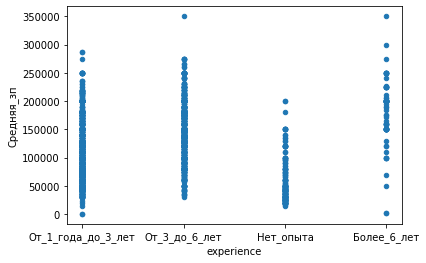

In [ ]:
df3.plot('experience','Средняя_зп',kind="scatter")

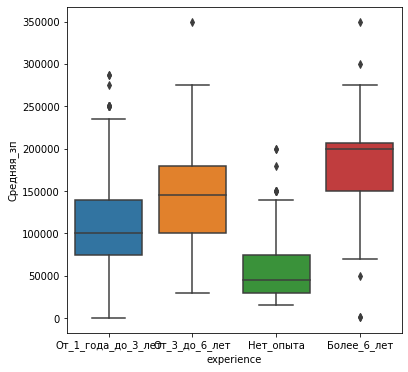

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience', y='Средняя_зп', data=df3)

Из графика видим, что средняя зарплата зависит от опыта работы. Проверим это с помощью статистических метоов.

##Проверка нормальности по критерию Шапиро-Уилка

Разбиваем на наборы данных по опыту работы и проверяем на нормальность распределения.

In [ ]:
d0 = df3[df3['experience']=="Нет_опыта"]
d1 = df3[df3['experience']=="От_1_года_до_3_лет"]
d2 = df3[df3['experience']=="От_3_до_6_лет"]
d3 = df3[df3['experience']=="Более_6_лет"]

print(stats.shapiro(d0['Средняя_зп']))
print(stats.shapiro(d1['Средняя_зп']))
print(stats.shapiro(d2['Средняя_зп']))
print(stats.shapiro(d3['Средняя_зп']))


ShapiroResult(statistic=0.8354174494743347, pvalue=3.477063743265868e-13)
ShapiroResult(statistic=0.9636837840080261, pvalue=1.2844139605645743e-17)
ShapiroResult(statistic=0.9877930879592896, pvalue=2.9840194315511326e-07)
ShapiroResult(statistic=0.9450513124465942, pvalue=0.0018145530484616756)


Данные количественные, но не нормальные, т.к. p-value < 0.05.

По критерию попадаем в непараметрические совокупности, групп 4, они независимые, поэтому берем критерий Краскала-Уоллеса. Процедура сравнивает средние значения.Проверим, является ли уровень опыта статистически важным.

In [ ]:
kwd1=np.array(df3[df3['experience']=="Нет_опыта"]['Средняя_зп'])
kwd2=np.array(df3[df3['experience']=="От_1_года_до_3_лет"]['Средняя_зп'])
kwd3=np.array(df3[df3['experience']=="От_3_до_6_лет"]['Средняя_зп'])
kwd4=np.array(df3[df3['experience']=="Более_6_лет"]['Средняя_зп'])
stats.mstats.kruskalwallis(kwd1,kwd2,kwd3,kwd4)

KruskalResult(statistic=588.2827282365665, pvalue=3.495410143833619e-127)

##Вывод

**Так как pvalue=3.495410143833619e-127 < 0.05, поэтому на данном уровне значимости нулевая гипотеза о равенстве средних отклоняется. Данные отличие является статистически важным и данный фактор будет влиять на наблюдение.**

---



#Нулевая гипотеза №2 Уровень заработной платы не зависит от графика работы(уровня занятости). (ВЛИЯНИЕ КАТЕГОРИАЛЬНЫХ ФАКТОРОВ. ONE HOT ENCODING. Dummy variables)

##Гистограмма зависимости Средней заработной платы от опыта работы

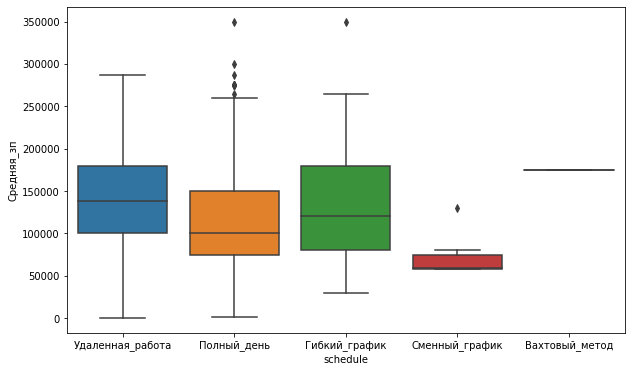

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='schedule', y='Средняя_зп', data=df3)

##Описательные статистики

In [ ]:
df3.drop(['schedule'],axis=1).describe()

,Средняя_зп
count,2555.000000
mean,120609.012329
std,53933.904644
min,130.000000
25%,80000.000000
50%,120000.000000
75%,150000.000000
max,350000.000000


Рассмотрим как выглядит среднее значение средней зп в зависимости графика работы

In [ ]:
df3.groupby('schedule')[['Средняя_зп']].mean()

,Средняя_зп
schedule,
Вахтовый_метод,175000.000000
Гибкий_график,128210.144928
Полный_день,114604.496531
Сменный_график,73750.000000
Удаленная_работа,138716.033058


Разбив на 5 групп по типу графика работы, получаем в каждой категории разное количество вакансий. Количество достаточно маленькое.

##Количество наблюдений

Количество соискателей, работающих по разным графикам

In [ ]:
df3.groupby('schedule')[['Средняя_зп']].count()

,Средняя_зп
schedule,
Вахтовый_метод,1
Гибкий_график,69
Полный_день,1874
Сменный_график,6
Удаленная_работа,605


##Создаем индикаторы уровня

Так как график работы - категориальный фактор, в котором 5 уровней, кодируем при помощи 0 и 1(фиктивные переменные - индикаторы уровня). В модель включаем n-1 признак(4). 

In [ ]:
fl01 = pd.concat((df3,pd.get_dummies(df3.schedule, prefix="", prefix_sep='',)),1)

In [ ]:
fl01

,schedule,experience,Средняя_зп,Вахтовый_метод,Гибкий_график,Полный_день,Сменный_график,Удаленная_работа
12889,Удаленная_работа,От_1_года_до_3_лет,203000.0,0,0,0,0,1
12890,Полный_день,От_3_до_6_лет,120000.0,0,0,1,0,0
12891,Полный_день,От_3_до_6_лет,120000.0,0,0,1,0,0
12892,Удаленная_работа,Нет_опыта,35000.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
17279,Полный_день,Нет_опыта,25000.0,0,0,1,0,0
17282,Полный_день,От_1_года_до_3_лет,185000.0,0,0,1,0,0
17284,Полный_день,От_1_года_до_3_лет,100000.0,0,0,1,0,0
17287,Полный_день,От_1_года_до_3_лет,175000.0,0,0,1,0,0


##Находим значения статистического анализа

###Зависимость зп от графика.

Определяем статистические параметры зависимости средней заработной платы от графика работы.

In [ ]:
resultsm = smf.ols('Средняя_зп ~ Вахтовый_метод + Гибкий_график + Сменный_график + Удаленная_работа', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Средняя_зп   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     25.53
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           9.09e-21
Time:                        21:57:08   Log-Likelihood:                -31413.
No. Observations:                2555   AIC:                         6.284e+04
Df Residuals:                    2550   BIC:                         6.286e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.146e+05   1222.620     93.737      0.000    1.12e+05    1.17e+05
Вахтовый_метод     6.04e+04   5.29e+04      1.141      0.254   -4.34e+04    1.64e+05
Гибкий_график     1.361e+04   6487.889      2.097      0.036     883.581    2.63e+04
Сменный_график   -4.085e+04   2.16e+04     -1.888      0.059   -8.33e+04    1582.938
Удаленная_работа  2.411e+04   2474.868      9.743      0.000    1.93e+04     2.9e+04
==============================================================================
Omnibus:                       73.704   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.765
Skew:                           0.432   Prob(JB):                     4.78e-18
Kurtosis:                       2.952   Cond. No.                         52.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Зависимость зп от графика и от опыта работы.

Определяем статистические параметры зависимости средней заработной платы от графика работы и опыта соискателя.

In [ ]:
resultsm = smf.ols('Средняя_зп ~ experience + Вахтовый_метод + Гибкий_график + Сменный_график + Удаленная_работа', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Средняя_зп   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sat, 16 Jul 2022   Prob (F-statistic):          9.45e-152
Time:                        21:51:04   Log-Likelihood:                -31101.
No. Observations:                2555   AIC:                         6.222e+04
Df Residuals:                    2547   BIC:                         6.226e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.776e+05   5277.821     33.641      0.000    1.67e+05    1.88e+05
experience[T.Нет_опыта]          -1.203e+05   6287.563    -19.136      0.000   -1.33e+05   -1.08e+05
experience[T.От_1_года_до_3_лет] -7.229e+04   5406.142    -13.373      0.000   -8.29e+04   -6.17e+04
experience[T.От_3_до_6_лет]       -3.92e+04   5463.609     -7.174      0.000   -4.99e+04   -2.85e+04
Вахтовый_метод                    3.665e+04   4.69e+04      0.781      0.435   -5.53e+04    1.29e+05
Гибкий_график                     9067.8792   5754.648      1.576      0.115   -2216.386    2.04e+04
Сменный_график                   -3.453e+04   1.92e+04     -1.802      0.072   -7.21e+04    3052.795
Удаленная_работа                  1.587e+04   2223.072      7.139      0.000    1.15e+04    2.02e+04
==============================================================================
Omnibus:                      103.233   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.478
Skew:                           0.489   Prob(JB):                     5.09e-26
Kurtosis:                       3.373   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Детерминация R-squared:	0.039 в случае, когда определяли зависимость только от графика работы  и 0.247, когда зависимость от опыта и графика, что говорит от езначительном влиянии фактора графика работы на уровень заработной платы. Чем ближе его значение коэффициента по модулю к 0, тем меньше связь результативного признака с исследуемыми факторами.
Смотрим на p-value - P>|t| - по пунктам, связанным с графиком, кроме пунктов про опыт > 0.000, что подтверждает теорию о незначимости графика работы.

##Таблица сопряженности

In [ ]:
wd=pd.crosstab(fl01['experience'],fl01['schedule']); wd

schedule,Вахтовый_метод,Гибкий_график,Полный_день,Сменный_график,Удаленная_работа
experience,,,,,
Более_6_лет,0,6,59,0,15
Нет_опыта,0,7,172,1,5
От_1_года_до_3_лет,0,30,993,3,289
От_3_до_6_лет,1,26,650,2,296


Смотря на таблицу сопряженности можно сделать вывод о том, что основная масса вакансий требует работы в полный день, особенно соискателей с малым и среднем уровнем опыта работы. 

##Критерий хи-квадрат для таблицы сопряженности.


 Проверим связанные ли эти два признака.

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 82.74101215646456
degrees of freedom: 12
p-value: 1.2350559188536517e-12



Получаем p-value: 1.2350559188536517e-12 >, чем 0.05, отклоняется нулевая гипотеза об отсутствии связи, следовательно признаки связанные.

Зависимый критерий можно исключить

In [ ]:
resultsm = smf.ols('Средняя_зп ~ experience', data=fl01).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Средняя_зп   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     254.2
Date:                Sat, 16 Jul 2022   Prob (F-statistic):          2.47e-144
Time:                        22:10:23   Log-Likelihood:                -31129.
No. Observations:                2555   AIC:                         6.227e+04
Df Residuals:                    2551   BIC:                         6.229e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.812e+05   5293.869     34.229      0.000    1.71e+05    1.92e+05
experience[T.Нет_опыта]          -1.234e+05   6335.929    -19.474      0.000   -1.36e+05   -1.11e+05
experience[T.От_1_года_до_3_лет] -7.233e+04   5452.522    -13.266      0.000    -8.3e+04   -6.16e+04
experience[T.От_3_до_6_лет]      -3.783e+04   5506.772     -6.869      0.000   -4.86e+04    -2.7e+04
==============================================================================
Omnibus:                       90.560   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.632
Skew:                           0.468   Prob(JB):                     2.32e-22
Kurtosis:                       3.243   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Вывод

Детерминация R-squared:	0.039 в случае, когда определяли зависимость только от графика работы  и 0.247, когда зависимость от опыта и графика, что говорит от езначительном влиянии фактора графика работы на уровень заработной платы. Чем ближе его значение коэффициента по модулю к 0, тем меньше связь результативного признака с исследуемыми факторами.

Смотрим на p-value - P>|t| - по пунктам, связанным с графиком, кроме пунктов про опыт > 0.000, что подтверждает теорию о незначимости графика работы.
Получаем p-value: 1.2350559188536517e-12 >, чем 0.05, отклоняется нулевая гипотеза об отсутствии связи, следовательно признаки связанные.

---



Замечания по работе:
1. При первичном открытии датасета оценить его размеры, выделить возможные проблемы (наличие пустых значений, дубликатов, несоответствие типов данных и т.д.) и продемонстрировать сам датасет
2. При проверке второй статистической гипотезы наблюдение с "вахтовым методом" можно было исключить из рассмотрения, так как оно одно (из одного наблюдения хорошей информации не вытащишь) и рассматривать уже не 5, а 4 вида графика работы
3. Отсутствуют комментарии в блоке множественной регрессии (какие признаки значимые, а от каких следует избавиться)
4. Вы верно ввели 5 фиктивных переменных, характеризующих график работы, и верно встраивали в модель множественной регрессии только 4 из них, только следовало бы посмотреть какой вариант набора 4 из 5 дал бы лучший результат (Вы остановились на наборе Вахтовый_метод + Гибкий_график + Сменный_график + Удаленная_работа, хотя из значений p-value видим, что Вахтовый метод и сменный график не значимы)

Рекомендации:
1. Можно было включить в работу обработку выбросов